In [37]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
torch.manual_seed(0)

from lstm import LSTMForecaster
from utils import *

In [59]:
nhid = 20 # Number of nodes in the hidden layer
n_dnn_layers = 1 # Number of hidden fully connected layers
input_features = 8
output_features = 1
batch_size = 16 # Training batch size
split = 0.8 # Train/Test Split ratio
sequence_len = 7
output_len = 1

USE_CUDA = torch.cuda.is_available()
device = 'cuda' if USE_CUDA else 'cpu'


In [65]:
model = LSTMForecaster(input_features, nhid, output_features, sequence_len, n_deep_layers=n_dnn_layers, use_cuda=USE_CUDA).to(device)
model.eval()

version = "025"
epoch = "26"

PATH = f"save_states/{version}_{epoch}.pth"
model.load_state_dict(torch.load(PATH))

RuntimeError: Error(s) in loading state_dict for LSTMForecaster:
	Missing key(s) in state_dict: "dnn.4.weight", "dnn.4.bias", "dnn.7.weight", "dnn.7.bias", "dnn.10.weight", "dnn.10.bias", "dnn.13.weight", "dnn.13.bias". 
	size mismatch for fc1.weight: copying a param with shape torch.Size([20, 600]) from checkpoint, the shape in current model is torch.Size([20, 140]).
	size mismatch for dnn.1.weight: copying a param with shape torch.Size([1, 20]) from checkpoint, the shape in current model is torch.Size([20, 20]).
	size mismatch for dnn.1.bias: copying a param with shape torch.Size([1]) from checkpoint, the shape in current model is torch.Size([20]).

In [61]:
lstm_weights = []
for param in model.parameters():
    lstm_weights.append(param.data.numpy())
input_to_hidden_weights = lstm_weights[0]
weight_magnitudes = np.abs(input_to_hidden_weights)
average_magnitudes = np.mean(weight_magnitudes, axis=0)

average_weights = np.mean(input_to_hidden_weights, axis=0)
print(average_weights)


[-0.015737    0.04269237  0.08532767  0.0481384  -0.02135239  0.00417483
  0.01647856 -0.00093321]


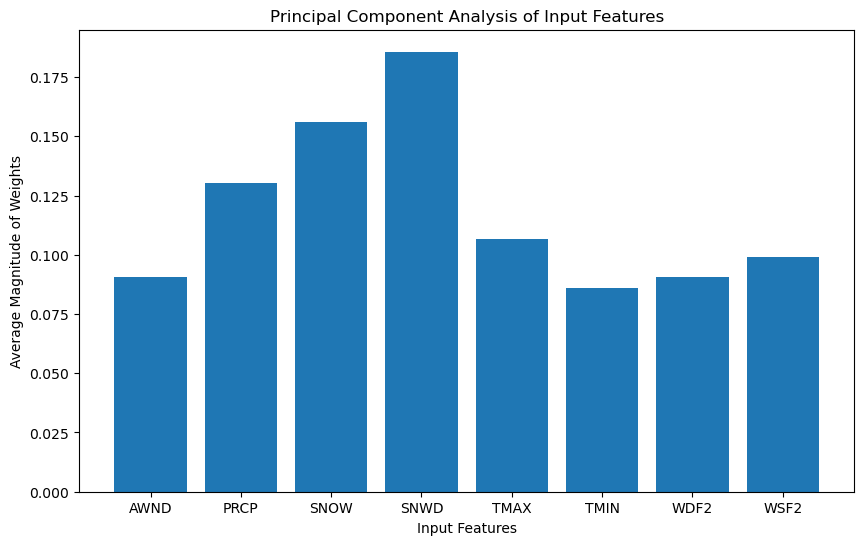

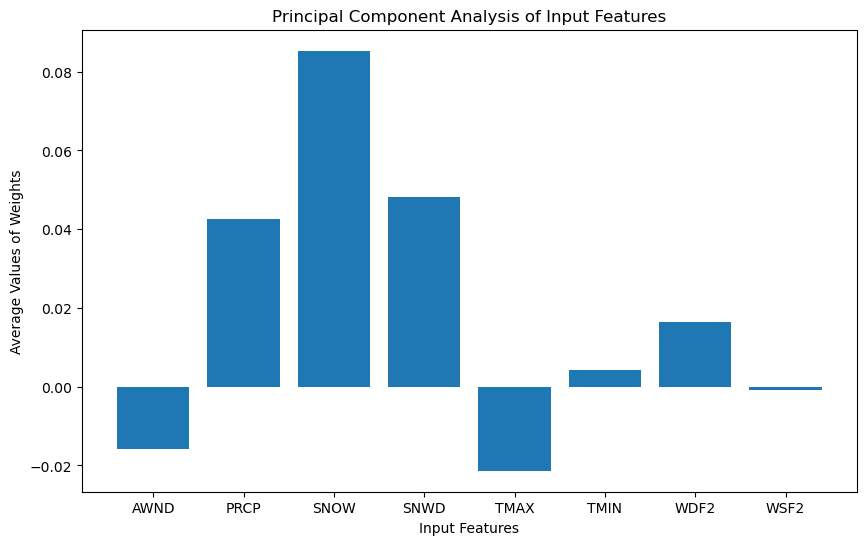

In [64]:
features_list = ["AWND","PRCP","SNOW","SNWD","TMAX","TMIN","WDF2","WSF2"]
#features_list = ["AWND","PRCP","SNOW","SNWD","TMAX","TMIN"]

plt.figure(figsize=(10,6))
plt.bar(features_list, average_magnitudes)
plt.xlabel('Input Features')
plt.ylabel('Average Magnitude of Weights')
plt.title("Principal Component Analysis of Input Features")
#plt.show()
plt.savefig("figures/pca_magnitude.png")
plt.figure(figsize=(10,6))
plt.bar(features_list, average_weights)
plt.xlabel('Input Features')
plt.ylabel('Average Values of Weights')
plt.title("Principal Component Analysis of Input Features")
plt.savefig("figures/pca_direction.png")
#plt.show()